In [361]:
from bs4 import BeautifulSoup
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium

In [3]:
df = pd.read_csv('SFO Pincodes.csv')
df['City'] = 'San Francisco'
df['State'] = 'California'
df

,Zip Codes,Neighborhood Name,City,State
0,94102,Hayes Valley,San Francisco,California
1,94103,SoMa,San Francisco,California
2,94104,Financial District,San Francisco,California
3,94105,Embarcadero South,San Francisco,California
4,94107,Portrero Hill,San Francisco,California
5,94108,Chinatown,San Francisco,California
6,94109,San Francisco,San Francisco,California
7,94109,Nob Hill,San Francisco,California
8,94109,Russian Hill,San Francisco,California
9,94110,Mission District,San Francisco,California


In [4]:
geolocator = Nominatim(timeout=10, user_agent = "Explore_SFO")
location = geolocator.geocode('San Francisco, USA')
location


Location(SF, California, USA, (37.7792808, -122.4192363, 0.0))

In [5]:
df_ = pd.read_csv('SFO_Longlat.csv')
df_

,Latitude,Longitude,Neighborhood
0,37.776685,-122.422936,"Hayes Valley, SF, California, 94102, USA"
1,37.780893,-122.400952,"South of Market, SF, California, 94104, USA"
2,37.793647,-122.398938,"Financial District, SF, California, 94111, USA"
3,37.792864,-122.396912,"Embarcadero, Market Street, Financial District..."
4,37.794301,-122.406376,"Chinatown, SF, California, 94107, USA"
5,37.779281,-122.419236,"SF, California, USA"
6,37.794479,-122.415592,"Nob Hill, SF, California, 94109, USA"
7,37.797707,-122.414971,"Russian Hill, SF, California, 94133, USA"
8,37.759930,-122.419138,"Mission District, SF, California, 94110, USA"
9,37.792864,-122.396912,"Embarcadero, Market Street, Financial District..."


In [6]:
address = 'San Francisco, USA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the City of San Francisco are {}, {}.'.format(latitude, longitude))

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of the City of San Francisco are 37.7792808, -122.4192363.


In [7]:
# create map of New York using latitude and longitude values
map_SFO = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_['Latitude'], df_['Longitude'], df_['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_SFO)  
    
map_SFO.save('SFO_Map.html')


In [8]:
CLIENT_ID = 'EKAVLYBDSDOTKIGQNR0HESELXK2CPPJGCTCJ15YNKG1K1TPW' # your Foursquare ID
CLIENT_SECRET = 'M0VWXVYO2L5OF2AD1EXVCDE3ULWSSADH344VUCDGRM2QEVKC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EKAVLYBDSDOTKIGQNR0HESELXK2CPPJGCTCJ15YNKG1K1TPW
CLIENT_SECRET:M0VWXVYO2L5OF2AD1EXVCDE3ULWSSADH344VUCDGRM2QEVKC


In [20]:
df_.loc[24,'Neighborhood']

'North Beach, SF, California, 94133, USA'

In [21]:
neighborhood_latitude = df_.loc[24,'Latitude']
neighborhood_longitude = df_.loc[24,'Longitude']
neighborhood_name = df_.loc[24,'Neighborhood']

print('Longitude and Latitude  values of {} are {},{}.'.format(neighborhood_name,neighborhood_latitude,neighborhood_longitude))

Longitude and Latitude  values of North Beach, SF, California, 94133, USA are 37.8011749,-122.4090021.


In [22]:
# type your answer here
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cc9adcd6a6071212463b3d2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'North Beach',
  'headerFullLocation': 'North Beach, San Francisco',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 119,
  'suggestedBounds': {'ne': {'lat': 37.8056749045, 'lng': -122.40331755221914},
   'sw': {'lat': 37.7966748955, 'lng': -122.41468664778085}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a469839f964a52029a91fe3',
       'name': 'Tony’s Pizza Napoletana',
       'location': {'address': '1570 Stockton St',
        'crossStreet': 'at Union St',
        'lat': 37.80038714317991,
        'lng': -1

In [24]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tony’s Pizza Napoletana,Pizza Place,37.800387,-122.409146
1,Golden Boy Pizza,Pizza Place,37.799840,-122.408070
2,Glow Yoga & Wellness,Yoga Studio,37.800125,-122.409114
3,Sotto Mare Oysteria and Seafood Restaurant,Seafood Restaurant,37.799625,-122.408357
4,Park Tavern,New American Restaurant,37.801097,-122.409301


In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
# type your answer here

NorthBeaches_SFO_venues = getNearbyVenues(names=df_['Neighborhood'],
                                   latitudes=df_['Latitude'],
                                   longitudes=df_['Longitude']
                                  )



Hayes Valley, SF, California, 94102, USA
South of Market, SF, California, 94104, USA
Financial District, SF, California, 94111, USA
Embarcadero, Market Street, Financial District, SF, California, 94111, USA
Chinatown, SF, California, 94107, USA
SF, California, USA
Nob Hill, SF, California, 94109, USA
Russian Hill, SF, California, 94133, USA
Mission District, SF, California, 94110, USA
Embarcadero, Market Street, Financial District, SF, California, 94111, USA
Ingleside, SF, California, 94112, USA
Castro District, SF, California, 94114, USA
Pacific Heights, SF, California, 94123, USA
Western Addition, SF, California, USA
Cole Valley, SF, California, 94117, USA
Richmond District, SF, California, 94121-3131, USA
Sunset District, SF, California, 94122-1515, USA
Cow Hollow, SF, California, 94123, USA
Marina District, SF, California, 14123, USA
Bayview, Lane Street, Bayview District, SF, California, 94124, USA
Saint Francis Wood, SF, California, 94127, USA
Presidio, Presidio Terrace, SF, Cali

In [32]:
print(NorthBeaches_SFO_venues.shape)
NorthBeaches_SFO_venues.head()

(1669, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Hayes Valley, SF, California, 94102, USA",37.776685,-122.422936,SFJazz Center,37.776350,-122.421539,Jazz Club
1,"Hayes Valley, SF, California, 94102, USA",37.776685,-122.422936,Ritual Coffee Roasters,37.776476,-122.424281,Coffee Shop
2,"Hayes Valley, SF, California, 94102, USA",37.776685,-122.422936,Blue Bottle Coffee,37.776430,-122.423224,Coffee Shop
3,"Hayes Valley, SF, California, 94102, USA",37.776685,-122.422936,Fatted Calf,37.775935,-122.423146,Butcher
4,"Hayes Valley, SF, California, 94102, USA",37.776685,-122.422936,Smitten Ice Cream,37.776273,-122.424235,Ice Cream Shop


In [34]:
print('There are {} unique categories of venues in North Beaches'.format(len(NorthBeaches_SFO_venues['Venue Category'].unique())))

There are 259 unique categories of venues in North Beaches


In [573]:
# one hot encoding
NorthBeaches_SFO_venues_onehot = pd.get_dummies(NorthBeaches_SFO_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NorthBeaches_SFO_venues_onehot['Neighborhood'] = NorthBeaches_SFO_venues['Neighborhood'] 


# move neighborhood column to the first column

def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

NorthBeaches_SFO_venues_onehot = change_column_order(NorthBeaches_SFO_venues_onehot,'Neighborhood',0)

NorthBeaches_SFO_venues_onehot.head()


,Neighborhood,Acai House,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,...,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Hayes Valley, SF, California, 94102, USA",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Hayes Valley, SF, California, 94102, USA",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Hayes Valley, SF, California, 94102, USA",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Hayes Valley, SF, California, 94102, USA",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Hayes Valley, SF, California, 94102, USA",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [574]:
NorthBeaches_SFO_venues_grouped = NorthBeaches_SFO_venues_onehot.groupby('Neighborhood').mean().reset_index()
NorthBeaches_SFO_venues_grouped

,Neighborhood,Acai House,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,...,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Bayview, Lane Street, Bayview District, SF, Ca...",0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Castro District, SF, California, 94114, USA",0.00,0.000000,0.00,0.00,0.020000,0.00,0.000000,0.000000,0.020000,...,0.00,0.00,0.000000,0.000000,0.00,0.020000,0.010000,0.000000,0.000000,0.020000
2,"Chinatown, SF, California, 94107, USA",0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.01,0.000000,0.020000,0.01,0.020000,0.000000,0.000000,0.000000,0.000000
3,"Cole Valley, SF, California, 94117, USA",0.00,0.016667,0.00,0.00,0.000000,0.00,0.016667,0.000000,0.000000,...,0.00,0.00,0.000000,0.016667,0.00,0.033333,0.000000,0.000000,0.000000,0.016667
4,"Cow Hollow, SF, California, 94123, USA",0.00,0.000000,0.00,0.00,0.020000,0.00,0.000000,0.000000,0.000000,...,0.00,0.01,0.000000,0.010000,0.00,0.050000,0.010000,0.000000,0.000000,0.000000
5,"Embarcadero, Market Street, Financial District...",0.01,0.000000,0.00,0.00,0.020000,0.00,0.000000,0.000000,0.000000,...,0.00,0.03,0.000000,0.010000,0.00,0.010000,0.000000,0.000000,0.000000,0.010000
6,"Financial District, SF, California, 94111, USA",0.01,0.000000,0.00,0.00,0.010000,0.00,0.000000,0.000000,0.000000,...,0.00,0.02,0.000000,0.010000,0.00,0.020000,0.010000,0.000000,0.000000,0.010000
7,"Fishermans Wharf, Russian Hill, SF, California...",0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.016129,0.016129,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,"Hayes Valley, SF, California, 94102, USA",0.00,0.010000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.010000,0.00,0.060000,0.020000,0.000000,0.000000,0.010000
9,"Ingleside, SF, California, 94112, USA",0.00,0.000000,0.00,0.00,0.030303,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.030303,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [575]:
NorthBeaches_SFO_venues_grouped.shape

(26, 259)

In [576]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [577]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NorthBeaches_SFO_venues_sorted = pd.DataFrame(columns=columns)
NorthBeaches_SFO_venues_sorted['Neighborhood'] = NorthBeaches_SFO_venues_grouped['Neighborhood']

for ind in np.arange(NorthBeaches_SFO_venues_grouped.shape[0]):
    NorthBeaches_SFO_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NorthBeaches_SFO_venues_grouped.iloc[ind, :], num_top_venues)

NorthBeaches_SFO_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bayview, Lane Street, Bayview District, SF, Ca...",Bakery,Southern / Soul Food Restaurant,Pool,Mexican Restaurant,Café,Fish Market,Gym,Pharmacy,Piercing Parlor,Dance Studio
1,"Castro District, SF, California, 94114, USA",Gay Bar,New American Restaurant,Thai Restaurant,Coffee Shop,Pet Store,Yoga Studio,Clothing Store,Seafood Restaurant,Men's Store,Mediterranean Restaurant
2,"Chinatown, SF, California, 94107, USA",Coffee Shop,Chinese Restaurant,Bakery,Men's Store,New American Restaurant,Dim Sum Restaurant,Szechuan Restaurant,Cocktail Bar,Dive Bar,Italian Restaurant
3,"Cole Valley, SF, California, 94117, USA",Thrift / Vintage Store,Shoe Store,Pizza Place,Record Shop,Bus Station,Breakfast Spot,Thai Restaurant,Gift Shop,Wine Bar,Bookstore
4,"Cow Hollow, SF, California, 94123, USA",Cosmetics Shop,French Restaurant,Wine Bar,Gym / Fitness Center,Italian Restaurant,Sandwich Place,Gym,Spa,Salad Place,Burrito Place
5,"Embarcadero, Market Street, Financial District...",Coffee Shop,Café,Japanese Restaurant,Sandwich Place,Seafood Restaurant,Vegetarian / Vegan Restaurant,Gym,Bakery,Cycle Studio,Juice Bar
6,"Financial District, SF, California, 94111, USA",Coffee Shop,Café,Sandwich Place,Deli / Bodega,Hotel,Juice Bar,Gym,New American Restaurant,Cycle Studio,Men's Store
7,"Fishermans Wharf, Russian Hill, SF, California...",Seafood Restaurant,Ice Cream Shop,Tour Provider,Hotel,Bike Rental / Bike Share,Diner,Boat or Ferry,Gym / Fitness Center,Bakery,Breakfast Spot
8,"Hayes Valley, SF, California, 94102, USA",Wine Bar,Boutique,French Restaurant,Clothing Store,Café,Optical Shop,New American Restaurant,Cocktail Bar,Furniture / Home Store,Sushi Restaurant
9,"Ingleside, SF, California, 94112, USA",Dim Sum Restaurant,Poke Place,Bubble Tea Shop,Japanese Restaurant,Food,Liquor Store,Gastropub,Mexican Restaurant,Burger Joint,Bus Station


In [578]:
# set number of clusters
kclusters = 4

NorthBeaches_SFO_venues_clustering = NorthBeaches_SFO_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NorthBeaches_SFO_venues_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 3, 0])

In [579]:
# add clustering labels
NorthBeaches_SFO_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NorthBeaches_merged = df_.join(NorthBeaches_SFO_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

NorthBeaches_merged # check the last columns!

,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,37.776685,-122.422936,"Hayes Valley, SF, California, 94102, USA",0,Wine Bar,Boutique,French Restaurant,Clothing Store,Café,Optical Shop,New American Restaurant,Cocktail Bar,Furniture / Home Store,Sushi Restaurant
1,37.780893,-122.400952,"South of Market, SF, California, 94104, USA",0,Coffee Shop,New American Restaurant,Spa,Art Gallery,Sandwich Place,Café,Hotel,Pizza Place,Vietnamese Restaurant,Marijuana Dispensary
2,37.793647,-122.398938,"Financial District, SF, California, 94111, USA",0,Coffee Shop,Café,Sandwich Place,Deli / Bodega,Hotel,Juice Bar,Gym,New American Restaurant,Cycle Studio,Men's Store
3,37.792864,-122.396912,"Embarcadero, Market Street, Financial District...",0,Coffee Shop,Café,Japanese Restaurant,Sandwich Place,Seafood Restaurant,Vegetarian / Vegan Restaurant,Gym,Bakery,Cycle Studio,Juice Bar
4,37.794301,-122.406376,"Chinatown, SF, California, 94107, USA",0,Coffee Shop,Chinese Restaurant,Bakery,Men's Store,New American Restaurant,Dim Sum Restaurant,Szechuan Restaurant,Cocktail Bar,Dive Bar,Italian Restaurant
5,37.779281,-122.419236,"SF, California, USA",0,Coffee Shop,Café,Cocktail Bar,French Restaurant,Performing Arts Venue,Sushi Restaurant,Beer Bar,Theater,Furniture / Home Store,Juice Bar
6,37.794479,-122.415592,"Nob Hill, SF, California, 94109, USA",0,Italian Restaurant,Park,Coffee Shop,Yoga Studio,Hotel,Spa,French Restaurant,Café,Bar,Grocery Store
7,37.797707,-122.414971,"Russian Hill, SF, California, 94133, USA",0,Italian Restaurant,Wine Bar,Park,Sushi Restaurant,French Restaurant,Pizza Place,Gym,Chinese Restaurant,Café,Latin American Restaurant
8,37.759930,-122.419138,"Mission District, SF, California, 94110, USA",0,Bar,Mexican Restaurant,New American Restaurant,Gift Shop,Bakery,Yoga Studio,Boutique,Bookstore,Cocktail Bar,Burger Joint
9,37.792864,-122.396912,"Embarcadero, Market Street, Financial District...",0,Coffee Shop,Café,Japanese Restaurant,Sandwich Place,Seafood Restaurant,Vegetarian / Vegan Restaurant,Gym,Bakery,Cycle Studio,Juice Bar


In [563]:
new_table = pd.DataFrame()
new_table['Cluster Labels'] = NorthBeaches_merged['Cluster Labels']
new_table['10th Most Common Venue'] = NorthBeaches_merged['10th Most Common Venue']
new_table

,Cluster Labels,10th Most Common Venue
0,0,Sushi Restaurant
1,0,Marijuana Dispensary
2,0,Men's Store
3,0,Juice Bar
4,0,Italian Restaurant
5,0,Juice Bar
6,0,Grocery Store
7,0,Latin American Restaurant
8,0,Burger Joint
9,0,Juice Bar


In [564]:
table = pd.pivot_table(new_table,index='Cluster Labels',columns=['10th Most Common Venue'],aggfunc={'10th Most Common Venue':'count'},fill_value=0)
table

10th Most Common Venue                              \
10th Most Common Venue              Bookstore Breakfast Spot Burger Joint   
Cluster Labels                                                              
0                                           1              1            1   
1                                           0              0            0   
2                                           0              0            0   
3                                           0              0            0   

                                                                            \
10th Most Common Venue Burrito Place Bus Line Bus Station Café Coffee Shop   
Cluster Labels                                                               
0                                  1        1           1    1           2   
1                                  0        0           0    0           0   
2                                  0        0           0    0           0   
3                                  0        0           0    0           0   

                                                  ...                  \
10th Most Common Venue Dance Studio Event Space   ...   Grocery Store   
Cluster Labels                                    ...                   
0                                 1           0   ...               1   
1                                 0           0   ...               0   
2                                 0           1   ...               0   
3                                 0           0   ...               0   

                                                                               \
10th Most Common Venue Italian Restaurant Juice Bar Latin American Restaurant   
Cluster Labels                                                                  
0                                       1         3                         1   
1                                       0         0                         0   
2                                       0         0                         0   
3                                       0         0                         0   

                                                                      \
10th Most Common Venue Marijuana Dispensary Mediterranean Restaurant   
Cluster Labels                                                         
0                                         1                        1   
1                                         0                        0   
2                                         0                        0   
3                                         0                        0   

                                                                  
10th Most Common Venue Men's Store Park Sushi Restaurant Theater  
Cluster Labels                                                    
0                                1    3                1       1  
1                                0    0                0       0  
2                                0    0                0       0  
3                                0    0                0       0  

[4 rows x 21 columns]

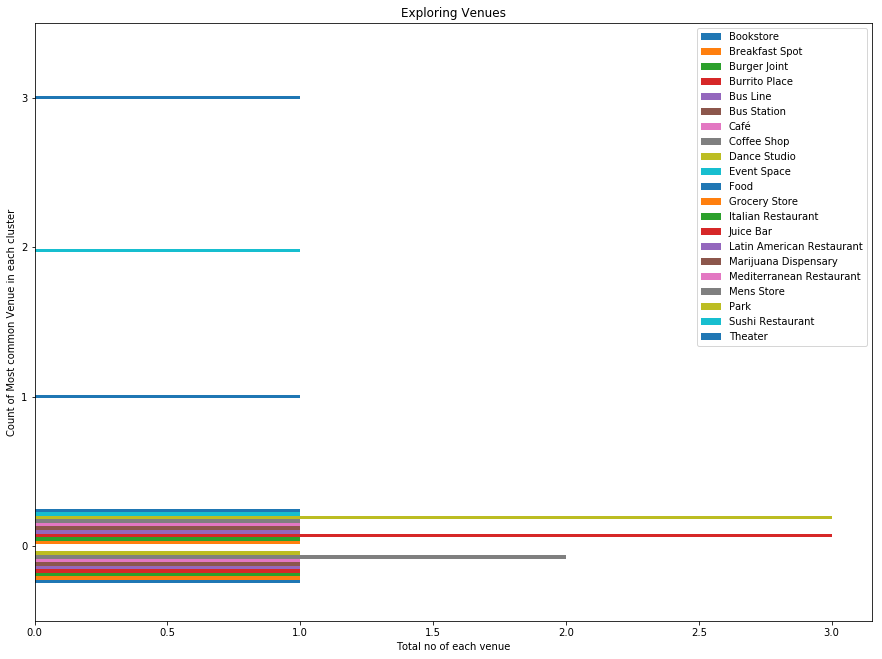

In [565]:
table.plot(kind='barh',figsize=(15,11),align='center')
plt.ylabel('Count of Most common Venue in each cluster')
plt.xlabel('Total no of each venue')
plt.title('Exploring Venues')
plt.gca().legend(('Bookstore', 'Breakfast Spot', 'Burger Joint', 'Burrito Place', 'Bus Line', 'Bus Station', 'Café', 'Coffee Shop', 'Dance Studio', 'Event Space', 'Food', 'Grocery Store', 'Italian Restaurant', 'Juice Bar', 'Latin American Restaurant', 'Marijuana Dispensary', 'Mediterranean Restaurant', 'Mens Store', 'Park', 'Sushi Restaurant', 'Theater'))
plt.show() 

In [566]:
table1 = NorthBeaches_merged.groupby(['Cluster Labels','10th Most Common Venue']).agg({'10th Most Common Venue':'count'})
table1

10th Most Common Venue
Cluster Labels 10th Most Common Venue                           
0              Bookstore                                       1
               Breakfast Spot                                  1
               Burger Joint                                    1
               Burrito Place                                   1
               Bus Line                                        1
               Bus Station                                     1
               Café                                            1
               Coffee Shop                                     2
               Dance Studio                                    1
               Grocery Store                                   1
               Italian Restaurant                              1
               Juice Bar                                       3
               Latin American Restaurant                       1
               Marijuana Dispensary                            1
               Mediterranean Restaurant                        1
               Men's Store                                     1
               Park                                            3
               Sushi Restaurant                                1
               Theater                                         1
1              Food                                            1
2              Event Space                                     1
3              Food                                            1

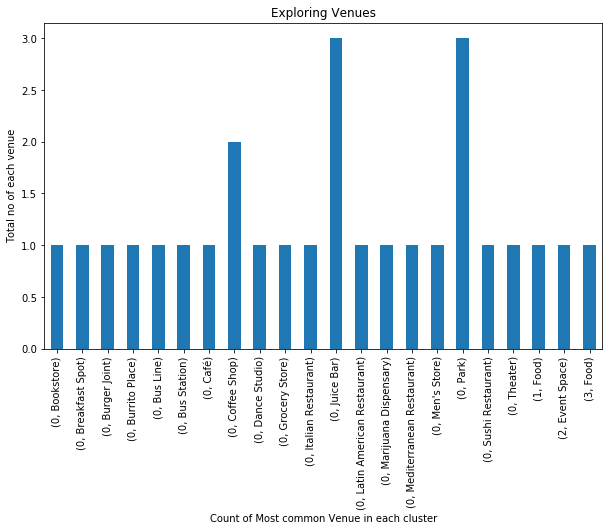

In [567]:
table1.plot(kind='bar',figsize=(10,6),legend=None)
plt.xlabel('Count of Most common Venue in each cluster')
plt.ylabel('Total no of each venue')
plt.title('Exploring Venues')
plt.show()

In [568]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NorthBeaches_merged['Latitude'], NorthBeaches_merged['Longitude'], NorthBeaches_merged['Neighborhood'], NorthBeaches_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('NorthBeaches_map_clusters.html')

In [569]:
NorthBeaches_merged.loc[NorthBeaches_merged['Cluster Labels'] == 0, NorthBeaches_merged.columns[[0]+[1]+[2]+[3]+[4] + list(range(5, NorthBeaches_merged.shape[1]))]]

,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,37.776685,-122.422936,"Hayes Valley, SF, California, 94102, USA",0,Wine Bar,Boutique,French Restaurant,Clothing Store,Café,Optical Shop,New American Restaurant,Cocktail Bar,Furniture / Home Store,Sushi Restaurant
1,37.780893,-122.400952,"South of Market, SF, California, 94104, USA",0,Coffee Shop,New American Restaurant,Spa,Art Gallery,Sandwich Place,Café,Hotel,Pizza Place,Vietnamese Restaurant,Marijuana Dispensary
2,37.793647,-122.398938,"Financial District, SF, California, 94111, USA",0,Coffee Shop,Café,Sandwich Place,Deli / Bodega,Hotel,Juice Bar,Gym,New American Restaurant,Cycle Studio,Men's Store
3,37.792864,-122.396912,"Embarcadero, Market Street, Financial District...",0,Coffee Shop,Café,Japanese Restaurant,Sandwich Place,Seafood Restaurant,Vegetarian / Vegan Restaurant,Gym,Bakery,Cycle Studio,Juice Bar
4,37.794301,-122.406376,"Chinatown, SF, California, 94107, USA",0,Coffee Shop,Chinese Restaurant,Bakery,Men's Store,New American Restaurant,Dim Sum Restaurant,Szechuan Restaurant,Cocktail Bar,Dive Bar,Italian Restaurant
5,37.779281,-122.419236,"SF, California, USA",0,Coffee Shop,Café,Cocktail Bar,French Restaurant,Performing Arts Venue,Sushi Restaurant,Beer Bar,Theater,Furniture / Home Store,Juice Bar
6,37.794479,-122.415592,"Nob Hill, SF, California, 94109, USA",0,Italian Restaurant,Park,Coffee Shop,Yoga Studio,Hotel,Spa,French Restaurant,Café,Bar,Grocery Store
7,37.797707,-122.414971,"Russian Hill, SF, California, 94133, USA",0,Italian Restaurant,Wine Bar,Park,Sushi Restaurant,French Restaurant,Pizza Place,Gym,Chinese Restaurant,Café,Latin American Restaurant
8,37.759930,-122.419138,"Mission District, SF, California, 94110, USA",0,Bar,Mexican Restaurant,New American Restaurant,Gift Shop,Bakery,Yoga Studio,Boutique,Bookstore,Cocktail Bar,Burger Joint
9,37.792864,-122.396912,"Embarcadero, Market Street, Financial District...",0,Coffee Shop,Café,Japanese Restaurant,Sandwich Place,Seafood Restaurant,Vegetarian / Vegan Restaurant,Gym,Bakery,Cycle Studio,Juice Bar


In [570]:
NorthBeaches_merged.loc[NorthBeaches_merged['Cluster Labels'] == 1, NorthBeaches_merged.columns[[0]+[1]+[2]+[3]+[4] + list(range(5, NorthBeaches_merged.shape[1]))]]

,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,37.81918,-122.350113,"San Francisco – Oakland Bay Bridge, Oakland, S...",1,Park,Nightclub,Rugby Pitch,Yoga Studio,French Restaurant,Fountain,Food Truck,Food Stand,Food & Drink Shop,Food


In [571]:
NorthBeaches_merged.loc[NorthBeaches_merged['Cluster Labels'] == 2, NorthBeaches_merged.columns[[0]+[1]+[2]+[3]+[4] + list(range(5, NorthBeaches_merged.shape[1]))]]

,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,37.727538,-122.497769,"Lake Merced, Lake Merced Bike Path, SF, Califo...",2,Golf Course,Park,Sculpture Garden,Recreation Center,American Restaurant,Gym Pool,Lake,Electronics Store,Ethiopian Restaurant,Event Space


In [572]:
NorthBeaches_merged.loc[NorthBeaches_merged['Cluster Labels'] == 3, NorthBeaches_merged.columns[[0]+[1]+[2]+[3]+[4] + list(range(5, NorthBeaches_merged.shape[1]))]]

,Latitude,Longitude,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,37.75464,-122.44648,"Twin Peaks, Christmas Tree Point Road, Cole Va...",3,Scenic Lookout,Trail,Reservoir,Bus Stop,Garden,Tailor Shop,Food Stand,Food Truck,Food & Drink Shop,Food
